## Loading the Dependencies

In [5]:
!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings 
warnings.filterwarnings("ignore")

sns.set()
plt.style.use('ggplot')

## Data Loading & Processing

In [3]:
# Loading the dataset
df = pd.read_csv("data.csv")
df.drop(columns = ['Unnamed: 32', 'id'], inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
55,B,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,...,12.840,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036
474,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,11.940,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800
216,B,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,...,13.250,27.10,86.20,531.2,0.14050,0.30460,0.28060,0.11380,0.3397,0.08365
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.420,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480


In [50]:
# Number of rows and columns 
df.shape

(569, 31)

In [15]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

M --> Malignant

B --> Benign

In [45]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [49]:
# Checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

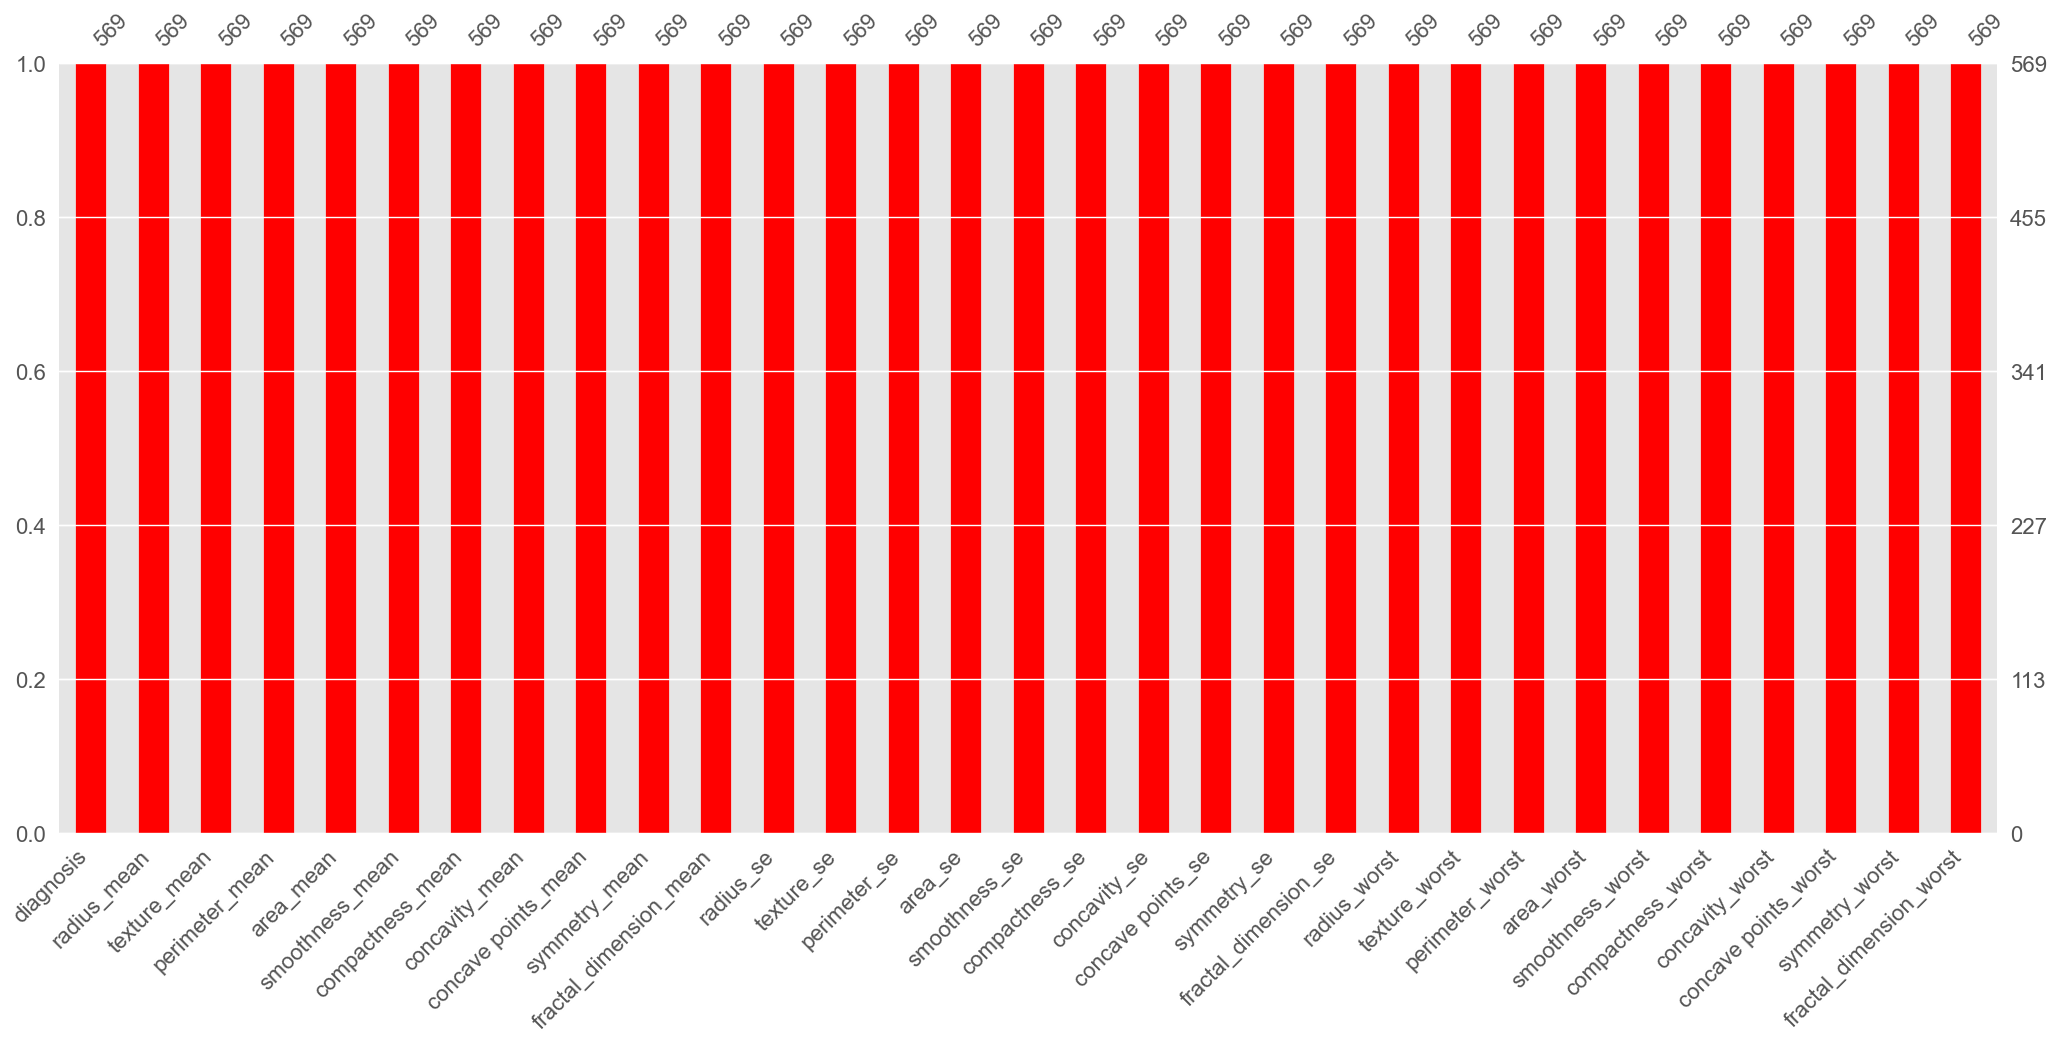

In [20]:
msno.bar(df, color = 'red')

There are no missing values in the dataset

In [51]:
# Statistical measures about the dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [55]:
# Checking the distribution of the Target Variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [61]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


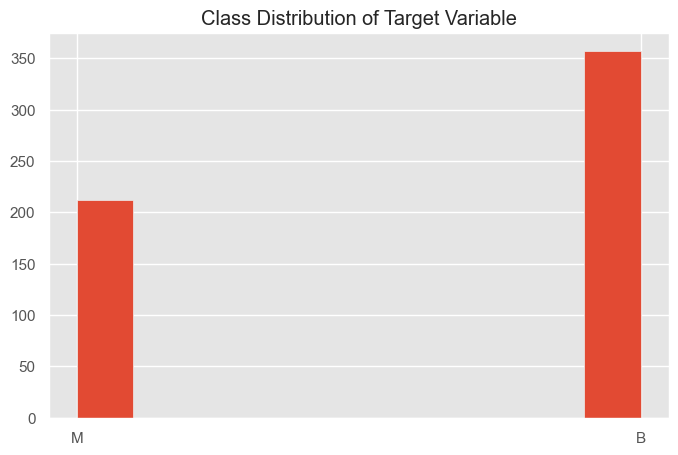

In [5]:
plt.figure(figsize = (8,5))
plt.hist(df['diagnosis'])
plt.title('Class Distribution of Target Variable')
plt.show()

## Exploratory Data Analysis

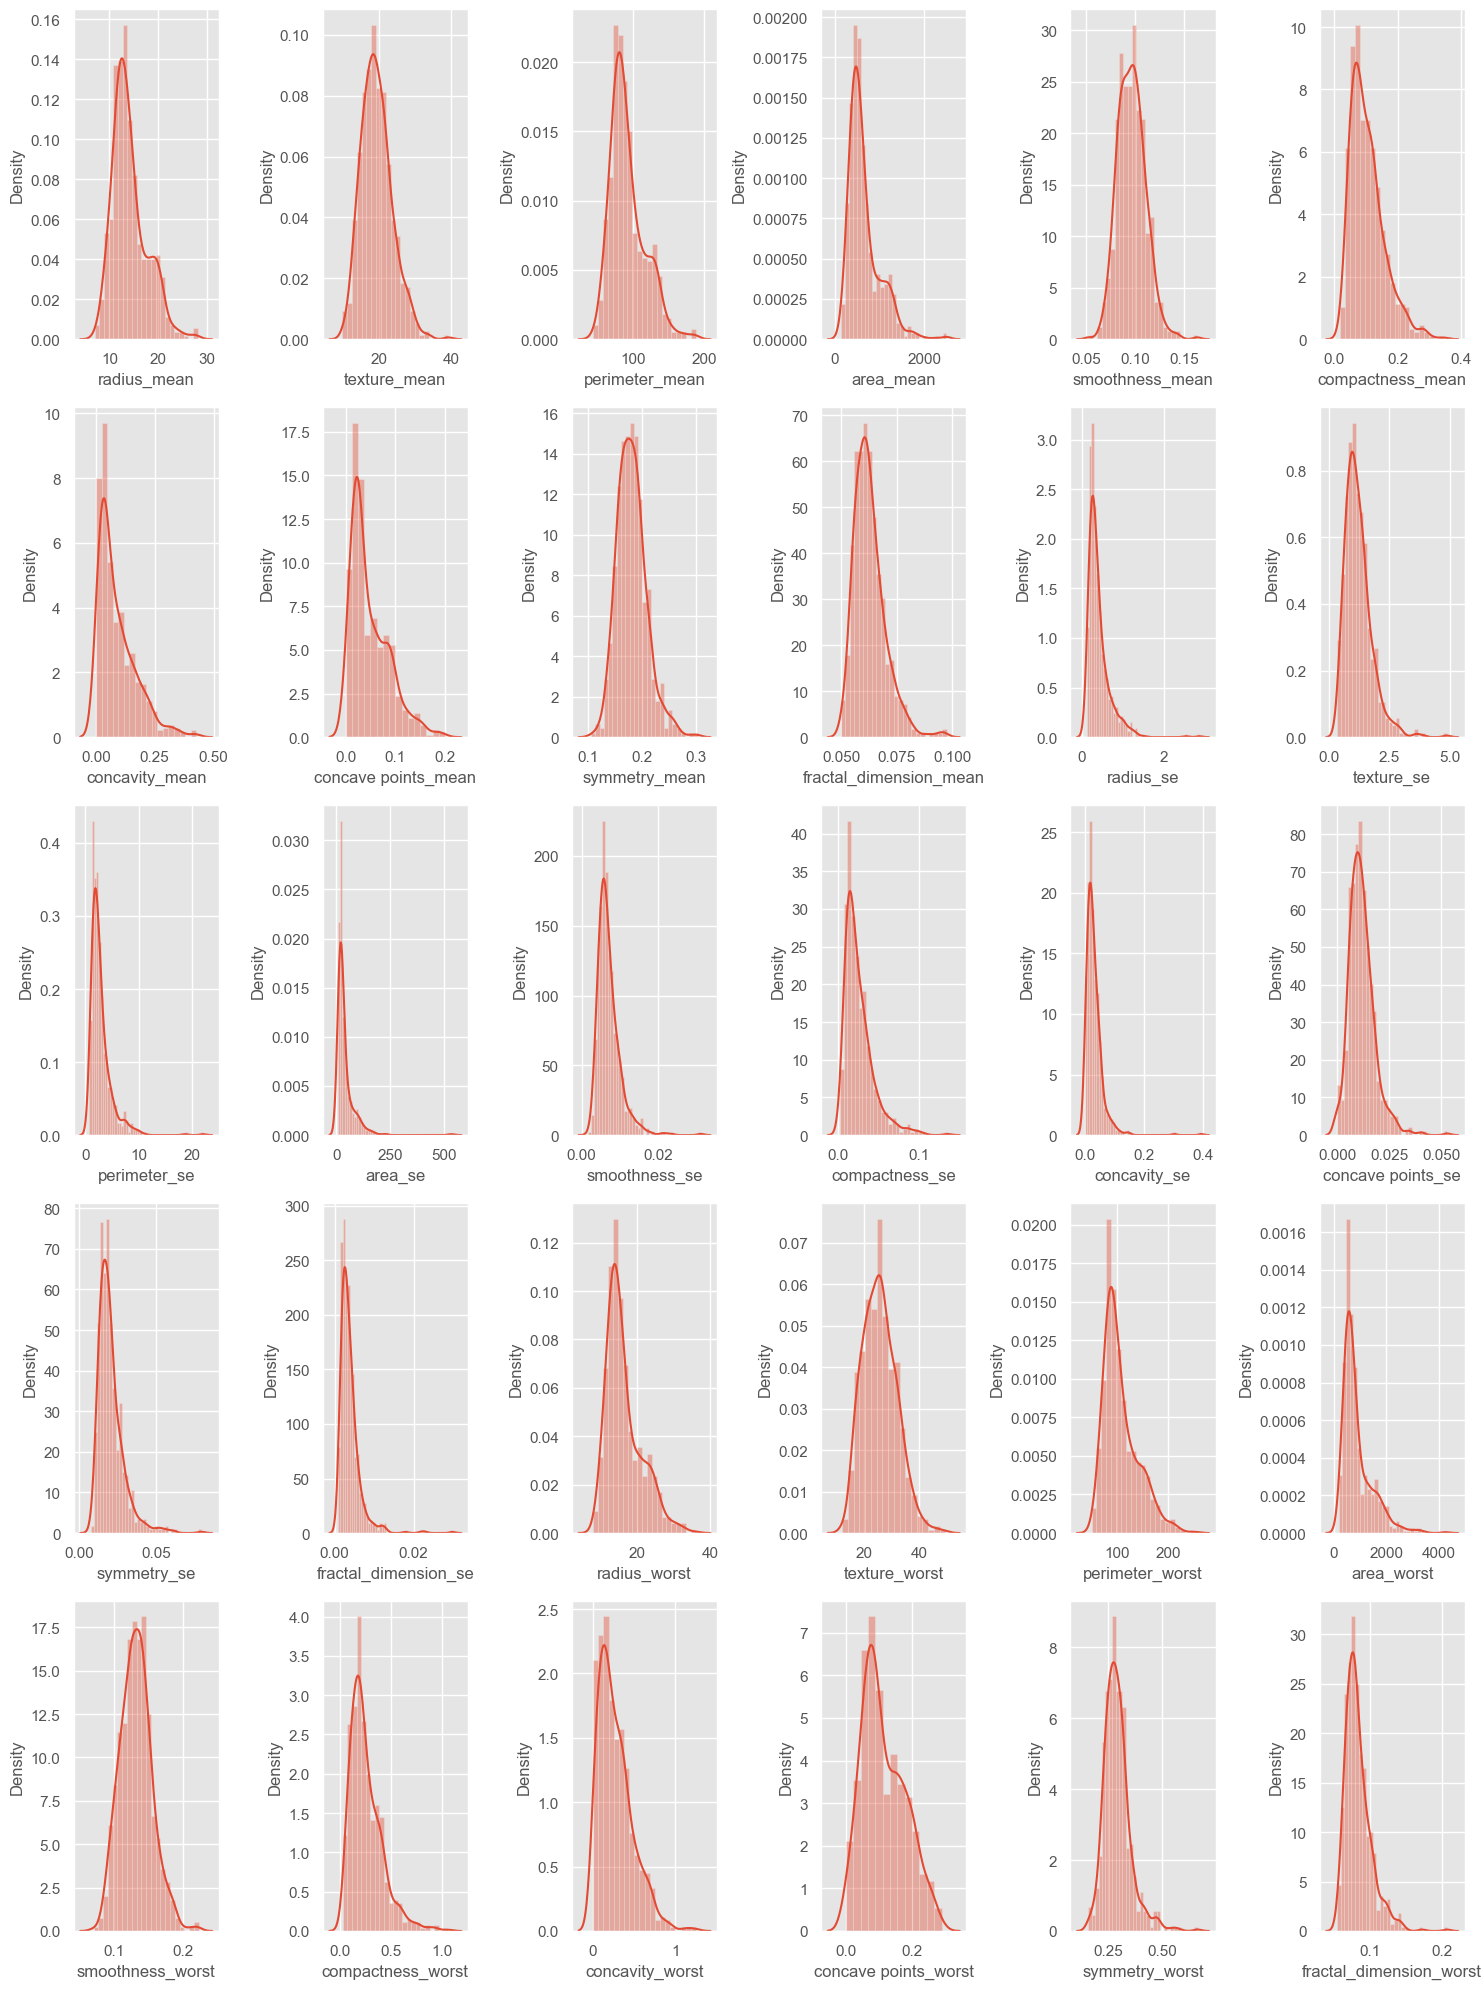

In [48]:
# Each of 5 rows having 6 columns
# Density plots

plt.figure(figsize = (15,20))
plotnumber = 1
for columns in df.drop(columns = 'diagnosis'):
    if plotnumber <= 30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [64]:
corr = df.corr(numeric_only = True)

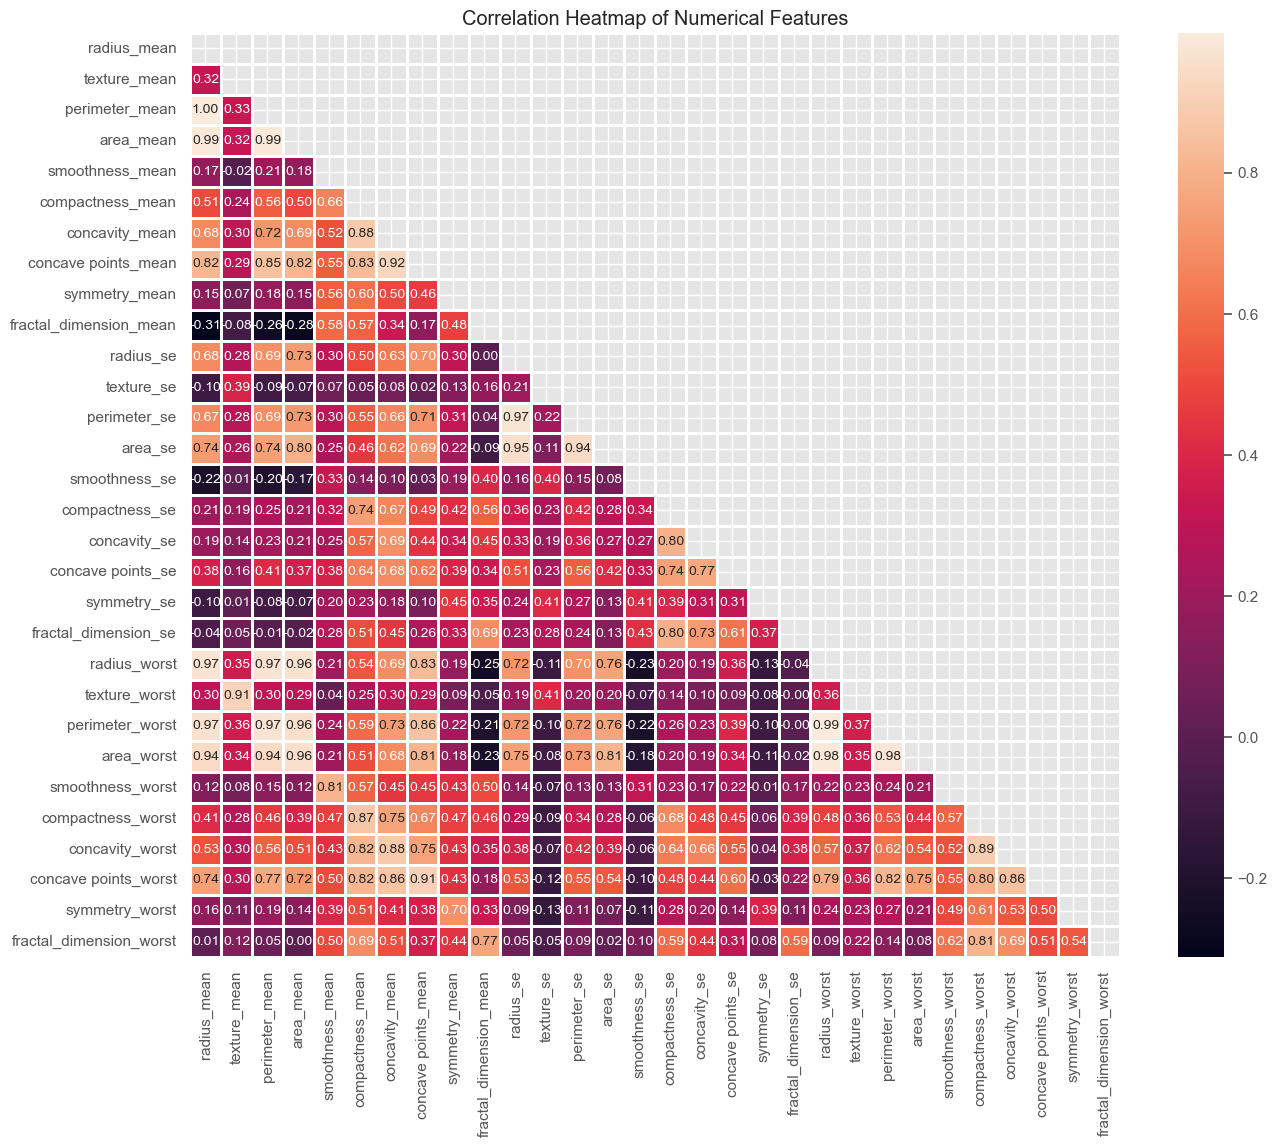

In [66]:
# Heatmap
plt.figure(figsize = (15,12))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidth = 1, annot = True, fmt = ".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [5]:
# Feature Selection

corr_mat = df.corr(numeric_only = True).abs()
mask = np.triu(np.ones_like(corr_mat, dtype = bool))
tri_df = corr_mat.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(df.shape[1])

23


In [9]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have reduced 32 features to 23

## ML Models

In [7]:
df["diagnosis"] = df["diagnosis"].replace({"B": 1, "M": 0})

### Separating feature and target

In [9]:
X = df.drop(columns = "diagnosis")
Y = df["diagnosis"]

In [11]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(569, 22) (455, 22) (114, 22)


In [15]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [19]:
# Training the LR model using training data
model1.fit(X_train, Y_train)

LogisticRegression()

In [21]:
# Accuracy on test data
Y_pred = model1.predict(X_test)

In [23]:
log_reg_acc = accuracy_score(Y_test, Y_pred)
print(log_reg_acc)

0.9824561403508771


In [25]:
print(confusion_matrix(Y_test, Y_pred))

[[43  2]
 [ 0 69]]


In [27]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      1.00      0.99        69

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### K-Nearest Neighbors Classifier

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
Y_pred = knn.predict(X_test)

In [33]:
knn_acc = accuracy_score(Y_test, Y_pred)
print(knn_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9736842105263158
[[42  3]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Support Vector Machines 

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability = True)

parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [37]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [39]:
grid_search.best_score_

0.9846153846153847

In [41]:
svc = SVC(C = 15, gamma = 0.01, probability = True)
svc.fit(X_train, Y_train)

SVC(C=15, gamma=0.01, probability=True)

In [43]:
Y_pred = svc.predict(X_test)

In [45]:
svc_acc = accuracy_score(Y_test, Y_pred)
print(svc_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9736842105263158
[[43  2]
 [ 1 68]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.97      0.99      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dt, parameters, cv = 5, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 27,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'random'}

In [51]:
grid_search.best_score_

0.964835164835165

In [53]:
dtc = DecisionTreeClassifier(
     criterion = 'entropy',
     max_depth = 17,
     min_samples_leaf = 3,
     min_samples_split = 4,
     splitter = 'random'
)

In [55]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=3,
                       min_samples_split=4, splitter='random')

In [57]:
Y_pred = dtc.predict(X_test)

In [59]:
dtc_acc = accuracy_score(Y_test, Y_pred)
print(dtc_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9035087719298246
[[39  6]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.91      0.93      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 10,
    max_features = 0.5,
    min_samples_leaf = 2,
    min_samples_split = 3,
    n_estimators = 130
)
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [63]:
Y_pred = RF.predict(X_test)

In [65]:
RF_acc = accuracy_score(Y_test, Y_pred)
print(RF_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9473684210526315
[[43  2]
 [ 4 65]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.97      0.94      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### Gradient Boosting 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.001, 0.1],
    'n_estimators' : [100, 150, 180]
}

grid = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [69]:
grid.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}

In [71]:
grid.best_score_

0.96261303037329

In [73]:
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, loss = 'exponential', n_estimators = 180
)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [75]:
Y_pred = gbc.predict(X_test)

In [77]:
gbc_acc = accuracy_score(Y_test, Y_pred)
print(gbc_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9473684210526315
[[42  3]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective = 'binary:logistic',
    learning_rate = 0.01,
    max_depth = 5,
    n_estimators =180
)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
Y_pred = xgb.predict(X_test)

In [83]:
xgb_acc = accuracy_score(Y_test, Y_pred)
print(xgb_acc)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9385964912280702
[[41  4]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.94      0.96      0.95        69

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [85]:
models = pd.DataFrame({
    'Model' : ['Logistics Regression', 'KNN', 'Decision Tree Classifier', 'SVM', 
               'Random Forest Classifier', 'Gradient Boosting', 'XGBoost'],
    'Score' :[100*round(log_reg_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4),
             100*round(RF_acc, 4), 100*round(gbc_acc, 4), 100*round(xgb_acc, 4)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistics Regression,98.25
1,KNN,97.37
2,Decision Tree Classifier,97.37
4,Random Forest Classifier,94.74
5,Gradient Boosting,94.74
6,XGBoost,93.86
3,SVM,90.35


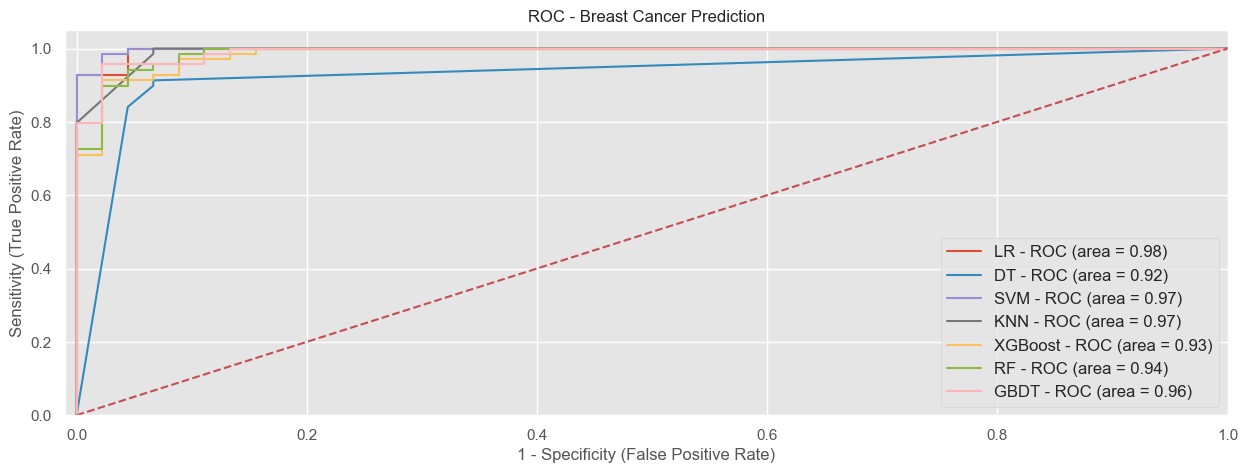

In [103]:
from sklearn import metrics
plt.figure(figsize=(15,5))
models = [
{
    'label': 'LR',
    'model': model1,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': RF,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[98.25, 90.35, 97.37, 97.37, 93.86, 94.74000000000001, 94.74000000000001]
[97.78, 94.15, 97.05, 96.67, 93.38, 94.88, 95.6]


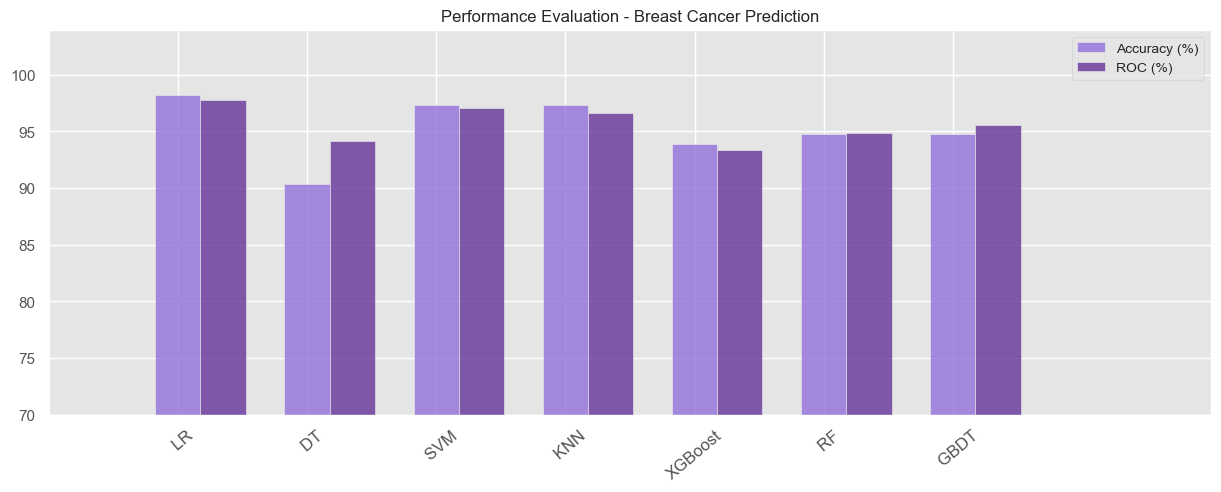

In [107]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': model1,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': RF,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(RF_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(15,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

## Building a Predictive System

In [124]:
input_data = (19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,
              0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model1.predict(input_data_reshape)

if(prediction[0] == 0):
    print('The Brest cancer is Malignant')
else:
    print('The Brest cancer is Benign')

The Brest cancer is Malignant


C:\Users\rbhat\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
